
Dataset Columns:
 Index(['Name', 'Age', 'Gender', 'BloodPressure', 'Diabetes', 'Readmitted'], dtype='object')

Target column detected as: Readmitted

 Accuracy: 0.5

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Hp\AppData\Local\Temp\ipykernel_14000\529216551.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[target_column] = df[target_column].replace({
c:\Users\Hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

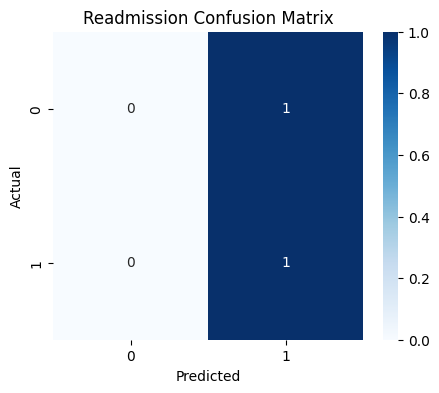

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Dataset
df = pd.read_csv("healthcare_readmission.csv")

print("\nDataset Columns:\n", df.columns)

# 2. Find Readmission Column Automatically
target_column = None
for col in df.columns:
    if "read" in col.lower():   # matches readmission, readmitted, etc
        target_column = col
        break

if target_column is None:
    raise Exception(" No Readmission column found in CSV")

print("\nTarget column detected as:", target_column)

# 3. Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

# 4. Convert Readmission Column to 0/1
df[target_column] = df[target_column].astype(str).str.lower()

df[target_column] = df[target_column].replace({
    "yes": 1, "y": 1, "true": 1, "1": 1,
    "no": 0, "n": 0, "false": 0, "0": 0
})

# Remove rows where target is still invalid
df = df[df[target_column].isin([0, 1])]

# 5. Convert Categorical Columns to Numeric
df = pd.get_dummies(df, drop_first=True)

# 6. Split Data into X and Y
X = df.drop(target_column, axis=1)
y = df[target_column]

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)

# 11. Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# 12. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Readmission Confusion Matrix")
plt.show()
